# Example usage for "movekit"

In [14]:
import movekit as mkit
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

### Read in CSV file

In [2]:
# Enter path to CSV file
path = "./datasets/fish-5.csv"

In [3]:
# Read in CSV file using appropriate method-
data = mkit.read_data(path)
data.head()

,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,390.33,405.89
3,1,811,445.15,411.94
4,1,905,366.06,451.76


#### Preprocess the data

In [4]:
preprocessed_data = mkit.preprocess(data)


 Number of missing values = y            0
x            0
animal_id    0
time         0
dtype: int64



In [44]:
data_groups = mkit.feature_extraction.grouping_data(preprocessed_data)

In [45]:
trajectories = {}
for aid in data_groups.keys():
    trajectories["trajectory_"+str(aid)]=list(zip(data_groups[aid]["x"], data_groups[aid]["y"]))
    

In [47]:
len(trajectories)

5

In [42]:
ts312 = list(zip(groups[312]["x"], groups[312]["y"]))

In [64]:
trajectories.keys()

dict_keys(['trajectory_312', 'trajectory_511', 'trajectory_607', 'trajectory_811', 'trajectory_905'])

In [66]:
[*trajectories.keys()][0]

'trajectory_312'

In [71]:
len([*trajectories.keys()])

5

In [76]:
distance_matr = np.empty((len([*trajectories.keys()]), len([*trajectories.keys()])))
for aid in range(len([*trajectories.keys()])):
    for aid2 in range(len([*trajectories.keys()])):
        distance[aid][aid2], path = fastdtw(trajectories[[*trajectories.keys()][aid]], trajectories[[*trajectories.keys()][aid2]], dist = euclidean)
    

In [77]:
distance

array([[    0.        , 30843.08540273, 32859.60013864, 42461.52455287,
        37916.4478291 ],
       [30843.08540273,     0.        , 26931.01432339, 47116.70811588,
        20967.9600727 ],
       [32859.60013864, 26931.01432339,     0.        , 39859.78792439,
        35711.71889837],
       [42461.52455287, 47116.70811588, 39859.78792439,     0.        ,
        38379.80643279],
       [37916.4478291 , 20967.9600727 , 35711.71889837, 38379.80643279,
            0.        ]])

In [54]:
distance, path = fastdtw(trajectories)

TypeError: fastdtw() missing 1 required positional argument: 'y'

In [52]:
print(distance)

0.0


In [53]:
print(path)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (99, 99), (100, 100), (101, 1

In [22]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)


2.8284271247461903


In [23]:
print(path)

[(0, 0), (1, 0), (2, 1), (3, 2), (4, 2)]


#### Extract features

In [5]:
data_features = mkit.extract_features(preprocessed_data, fps = 10)
data_features.head(10)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped
0,1,312,405.29,417.76,0.000000,0.000000,0.0,0.000000,0
1,2,312,405.31,417.37,0.390512,0.000000,0.0,-87.064327,0
2,3,312,405.31,417.07,0.300000,0.000000,0.0,-90.000000,0
3,4,312,405.30,416.86,0.210238,0.000000,0.0,-92.726311,0
4,5,312,405.29,416.71,0.150333,0.000000,0.0,-93.814075,0
5,6,312,405.27,416.61,0.101980,0.000000,0.0,-101.309932,0
6,7,312,405.27,416.54,0.070000,0.000000,0.0,-90.000000,0
7,8,312,405.27,416.49,0.050000,0.000000,0.0,-90.000000,0
8,9,312,405.31,416.37,0.126491,0.000000,0.0,-71.565051,0
9,10,312,405.38,416.27,0.122066,0.152162,0.0,-55.007980,1


#### Time series analysis

Possible parameters to extract time sereis features are: 

- *absolute_sum_of_changes(x)*	Returns the sum over the absolute value of consecutive changes in the series x
- *agg_autocorrelation(x, param)*	Calculates the value of an aggregation function f_{agg} 
- *agg_linear_trend(x, param)*	Calculates a linear least-squares regression for values of the time series that were aggregated over chunks versus the sequence from 0 up to the number of chunks minus one.
- *approximate_entropy(x, m, r)*	Implements a vectorized Approximate entropy algorithm.
- *ar_coefficient(x, param)*	This feature calculator fits the unconditional maximum likelihood of an autoregressive AR(k) process.
- *augmented_dickey_fuller(x, param)*	The Augmented Dickey-Fuller test is a hypothesis test which checks whether a unit root is present in a time series sample.
- *autocorrelation(x, lag)*	Calculates the autocorrelation of the specified lag, according to the formula [1]
- *has_duplicate(x)*	Checks if any value in x occurs more than once
- *kurtosis(x)*	Returns the kurtosis of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G2).
- *large_standard_deviation(x, r)*	Boolean variable denoting if the standard dev of x is higher than ‘r’ times the range = difference between max and min of x.
- *last_location_of_maximum(x)*	Returns the relative last location of the maximum value of x.
- *length(x)*	Returns the length of x
- *linear_trend(x, param)*	Calculate a linear least-squares regression for the values of the time series versus the sequence from 0 to length of the time series minus one.
- *maximum(x)*	Calculates the highest value of the time series x.
- *mean(x)*	Returns the mean of x
- *median(x)*	Returns the median of x
- *minimum(x)*	Calculates the lowest value of the time series x.
- *number_crossing_m(x, m)*	Calculates the number of crossings of x on m.
- *number_cwt_peaks(x, n)*	This feature calculator searches for different peaks in x.
- *number_peaks(x, n)*	Calculates the number of peaks of at least support n in the time series x.
- *partial_autocorrelation(x, param)*	Calculates the value of the partial autocorrelation function at the given lag.
- *quantile(x, q)*	Calculates the q quantile of x.
- *range_count(x, min, max)*	Count observed values within the interval [min, max).
- *sample_entropy(x)*	Calculate and return sample entropy of x.
- *set_property(key, value)*	This method returns a decorator that sets the property key of the function to value
- *skewness(x)*	Returns the sample skewness of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G1).
- *standard_deviation(x)*	Returns the standard deviation of x
- *sum_of_reoccurring_data_points(x)*	Returns the sum of all data points, that are present in the time series more than once.
- *sum_of_reoccurring_values(x)*	Returns the sum of all values, that are present in the time series more than once.
- *sum_values(x)*	Calculates the sum over the time series values
- *value_count(x, value)*	Count occurrences of value in time series x.
- *variance(x)*	Returns the variance of x



In [6]:
# For example autocorrelation 
auto_corr = mkit.ts_feature(data_features, 'autocorrelation')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.35it/s]


In [7]:
auto_corr

variable,average_acceleration__autocorrelation__lag_0,average_acceleration__autocorrelation__lag_1,average_acceleration__autocorrelation__lag_2,average_acceleration__autocorrelation__lag_3,average_acceleration__autocorrelation__lag_4,average_acceleration__autocorrelation__lag_5,average_acceleration__autocorrelation__lag_6,average_acceleration__autocorrelation__lag_7,average_acceleration__autocorrelation__lag_8,average_acceleration__autocorrelation__lag_9,...,y__autocorrelation__lag_0,y__autocorrelation__lag_1,y__autocorrelation__lag_2,y__autocorrelation__lag_3,y__autocorrelation__lag_4,y__autocorrelation__lag_5,y__autocorrelation__lag_6,y__autocorrelation__lag_7,y__autocorrelation__lag_8,y__autocorrelation__lag_9
id,,,,,,,,,,,,,,,,,,,,,
312,1.0,0.973705,0.903485,0.794941,0.657646,0.500612,0.332134,0.163883,0.004863,-0.134870,...,1.0,1.000433,1.000799,1.001097,1.001328,1.001492,1.001589,1.001619,1.001585,1.001487
511,1.0,0.972421,0.903822,0.801625,0.675504,0.533282,0.382749,0.232853,0.090443,-0.036413,...,1.0,1.000432,1.000795,1.001090,1.001316,1.001472,1.001556,1.001568,1.001507,1.001375
607,1.0,0.968225,0.889882,0.775188,0.637960,0.490480,0.339141,0.194015,0.063619,-0.042812,...,1.0,1.000653,1.001235,1.001747,1.002191,1.002566,1.002874,1.003116,1.003293,1.003406
811,1.0,0.958974,0.875989,0.763612,0.634883,0.502997,0.364971,0.227156,0.099802,-0.009565,...,1.0,1.000724,1.001366,1.001928,1.002409,1.002810,1.003132,1.003375,1.003540,1.003628
905,1.0,0.964913,0.870211,0.726141,0.547292,0.349784,0.148178,-0.042093,-0.207669,-0.338110,...,1.0,1.000210,1.000370,1.000482,1.000546,1.000563,1.000537,1.000469,1.000361,1.000215


__Extract all possible time series features__ 

In [9]:
ts_features = mkit.ts_all_features(data_features)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:17<00:00,  1.67it/s]


In [11]:
ts_features

variable,average_acceleration__abs_energy,average_acceleration__absolute_sum_of_changes,"average_acceleration__agg_autocorrelation__f_agg_""mean""__maxlag_40","average_acceleration__agg_autocorrelation__f_agg_""median""__maxlag_40","average_acceleration__agg_autocorrelation__f_agg_""var""__maxlag_40","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,y__symmetry_looking__r_0.9,y__symmetry_looking__r_0.9500000000000001,y__time_reversal_asymmetry_statistic__lag_1,y__time_reversal_asymmetry_statistic__lag_2,y__time_reversal_asymmetry_statistic__lag_3,y__value_count__value_-1,y__value_count__value_0,y__value_count__value_1,y__variance,y__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
312,0.066529,1.241241,0.025990,-0.025730,0.107966,-0.000168,0.421174,0.000101,0.000022,-0.000141,...,1.0,1.0,-77971.642077,-156842.576071,-236813.479571,0.0,0.0,0.0,14644.838227,1.0
511,0.106340,1.383138,0.000897,-0.086529,0.107008,-0.001042,0.316145,0.000122,0.000037,-0.003024,...,1.0,1.0,-90215.704386,-181516.888177,-274115.312406,0.0,0.0,0.0,19244.251098,1.0
607,0.070812,1.438458,-0.016170,-0.133832,0.099074,0.001082,0.343657,0.000086,0.000024,0.002442,...,1.0,1.0,-54841.233217,-110877.905368,-167859.854676,0.0,0.0,0.0,17028.654780,1.0
811,0.048209,1.462494,0.035375,-0.120226,0.098024,0.001738,0.223827,0.000048,0.000021,0.003446,...,1.0,1.0,-54605.532626,-109901.843012,-165981.404659,0.0,0.0,0.0,19149.768360,1.0
905,0.095643,1.628473,0.000243,-0.044027,0.106217,-0.000118,0.438369,0.000132,0.000027,0.001294,...,1.0,1.0,-114928.392800,-231110.694731,-255690.556052,0.0,1.0,0.0,23317.634166,1.0


#### Compute the Euclidean distance 

Return the normalized Euclidean distance between movers for each time step

In [12]:
res = mkit.euclidean_dist(data_features)

In [13]:
res.head(10)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,312,511,607,811,905
_temporary_index_column,,,,,,,,,,,,,,
0,1,312,405.29,417.76,0.000000,0.0,0.0,0.000000,0,0.000000,0.051556,0.031335,0.053634,0.086859
1000,1,511,369.99,428.78,0.000000,0.0,0.0,0.000000,0,0.051556,0.000000,0.054141,0.104494,0.047578
2000,1,607,390.33,405.89,0.000000,0.0,0.0,0.000000,0,0.031335,0.054141,0.000000,0.072971,0.099632
3000,1,811,445.15,411.94,0.000000,0.0,0.0,0.000000,0,0.053634,0.104494,0.072971,0.000000,0.132203
4000,1,905,366.06,451.76,0.000000,0.0,0.0,0.000000,0,0.086859,0.047578,0.099632,0.132203,0.000000
1,2,312,405.31,417.37,0.390512,0.0,0.0,-87.064327,0,0.000000,0.051951,0.030797,0.053726,0.087677
1001,2,511,370.01,428.82,0.044721,0.0,0.0,63.434949,0,0.051951,0.000000,0.054148,0.104689,0.047528
2001,2,607,390.25,405.89,0.080000,0.0,0.0,180.000000,0,0.030797,0.054148,0.000000,0.073615,0.099682
3001,2,811,445.48,412.26,0.459674,0.0,0.0,44.118596,0,0.053726,0.104689,0.073615,0.000000,0.132343


#### Plotting the data

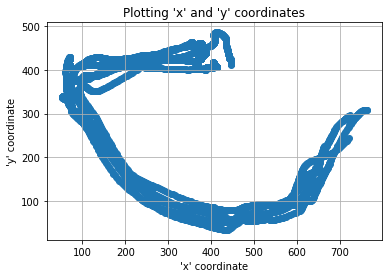

In [7]:
# plot movement 
mkit.plot_movement(data, frm=0, to = 1000)

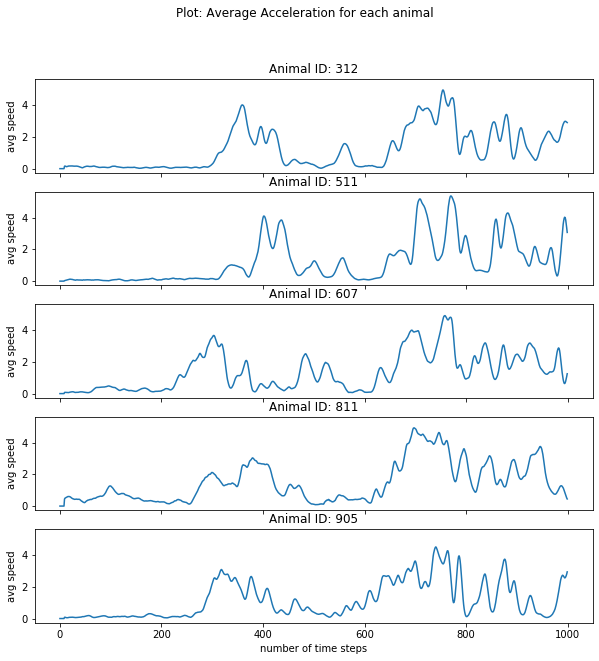

In [9]:
plot_pace(data_features, "speed")

### Save to CSV

In [15]:
# save features to csv 
data_features.to_csv("fish-5-features.csv")

In [16]:
# export the time series data 
ts_features.to_json("fish-5-time-series.json")